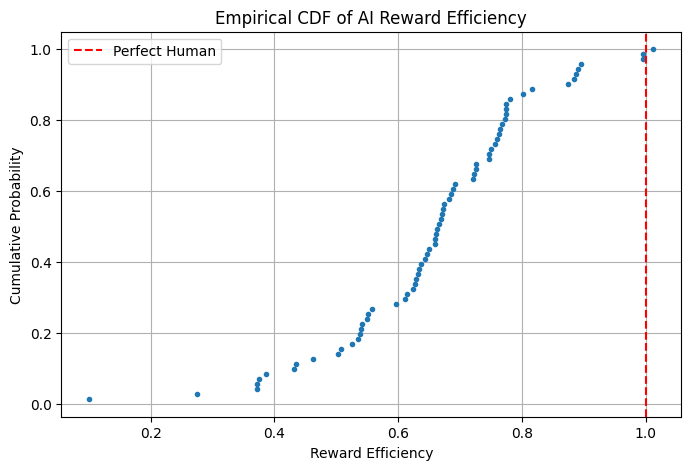

In [6]:
# ECDF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load csv
df = pd.read_csv('../../Data/GeneratedData/m10smol_data.csv')

# Sort data
sorted_efficiency = np.sort(df['reward_efficiency'])
cdf = np.arange(1, len(sorted_efficiency) + 1) / len(sorted_efficiency)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_efficiency, cdf, marker='.', linestyle='none')
plt.axvline(1.0, color='red', linestyle='--', label='Perfect Human')
plt.title('Empirical CDF of AI Reward Efficiency')
plt.xlabel('Reward Efficiency')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

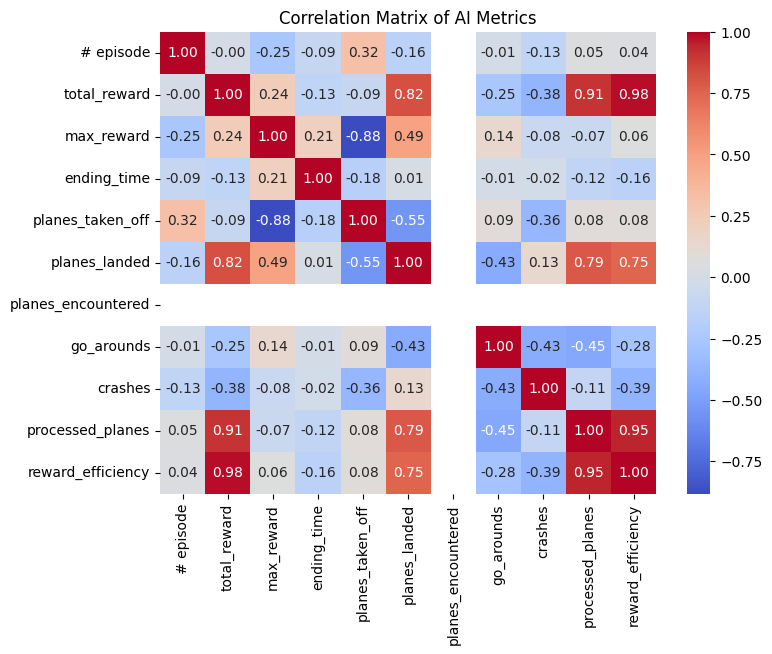

In [7]:
# correlation testing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load or simulate your data
df_big = pd.DataFrame({
    'reward_efficiency': df['reward_efficiency'],
    'ending_time': df['ending_time'],
    'go_arounds': df['go_arounds'],
    'crashes': df['crashes']
})

# Derived columns
df['processed_planes'] = (df['planes_taken_off'] + df['planes_landed']) / 10

# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of AI Metrics")
plt.show()


In [9]:
# Wilcoxon signed-rank test

from scipy.stats import wilcoxon

# Assume ai_reward_efficiency is a NumPy array of your data
stat, p_value = wilcoxon(df['reward_efficiency'] - 1.0, alternative='less')

print(f"Wilcoxon statistic: {stat}")
print(f"P-value: {p_value:.20f}")

Wilcoxon statistic: 3.0
P-value: 0.00000000000013807699


In [10]:
# Cohen's d
import numpy as np

# Assuming ai_reward_efficiency is a NumPy array of your data
human_score = 1.0

mean_ai = np.mean(df['reward_efficiency'])
std_ai = np.std(df['reward_efficiency'], ddof=1)  # Use sample std

cohens_d = (mean_ai - human_score) / std_ai

print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: -2.069


In [12]:
# Cohen's d + confidence intervals

bootstrap_ds = []
for _ in range(10000):
    sample = np.random.choice(df['reward_efficiency'], size=len(df['reward_efficiency']), replace=True)
    mean_sample = np.mean(sample)
    std_sample = np.std(sample, ddof=1)
    bootstrap_ds.append((mean_sample - human_score) / std_sample)

ci_lower = np.percentile(bootstrap_ds, 2.5)
ci_upper = np.percentile(bootstrap_ds, 97.5)

print(f"Bootstrapped CI for Cohen's d: [{ci_lower:.2f}, {ci_upper:.2f}]")

Bootstrapped CI for Cohen's d: [-2.61, -1.72]
